In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#I manually chopped out SOL as easier to work with one asset to start
df = pd.read_csv(r"C:/Users/asus/Desktop/Work/BenTestSOL.csv")
#Name some columns
df2 = df.set_axis(['Time', 'Asset', 'MidPrice', 'MP', 'LiqSell', 'LS', 'Liqbuy', 'LB', 'Nan'], axis=1)

In [166]:
# Convert the 'LS' and LB columns to float
df2['LS'] = df2['LS'].astype(float)
df2['LB'] = df2['LB'].astype(float)
# Convert non zero values in the 'LS' column to 1 and non zero value in LB to -1 for long/short trade signal purposes
df2['LS'] = df2['LS'].apply(lambda x: 1 if x > 0 else x)
df2['LB'] = df2['LB'].apply(lambda x: -1 if x > 0 else x)

In [167]:
#This shifts time ahead so we can consider an entry signal that holds for x periods this does not look at prior market return

df2['Entry']=df2['MP'].shift(-1)#Shifted 1 period ahead of our signal as we begin quoting after recieving signal
df2['Entry+1']=df2['MP'].shift(-2)#This is 2 periods after the signal but 1 period after our expected entry
df2['Entry+5']=df2['MP'].shift(-6)
df2['Entry+10']=df2['MP'].shift(-11)
df2['Entry+30']=df2['MP'].shift(-31)
df2['Entry+60']=df2['MP'].shift(-61)       

In [168]:
#Long and hold results for x seconds after a liquidation sell from Binance
df2['Long1s'] = df2['LS']*((df2['Entry+1'] - df2['Entry']) / df2['Entry'])
df2['Long5s'] = df2['LS']*((df2['Entry+5'] - df2['Entry']) / df2['Entry'])
df2['Long10s'] = df2['LS']*((df2['Entry+10'] - df2['Entry']) / df2['Entry'])
df2['Long30s'] = df2['LS']*((df2['Entry+30'] - df2['Entry']) / df2['Entry'])
df2['Long60s'] = df2['LS']*((df2['Entry+60'] - df2['Entry']) / df2['Entry'])

In [169]:
print(f"The return when buying short liquidations for 1s is:{df2['Long1s'].sum()}")
print(f"The return when buying short liquidations for 5s is:{df2['Long5s'].sum()}")
print(f"The return when buying short liquidations for 10s is:{df2['Long10s'].sum()}")
print(f"The return when buying short liquidations for 30s is:{df2['Long30s'].sum()}")
print(f"The return when buying short liquidations for 60s is:{df2['Long60s'].sum()}")

The return when buying liquidations for 1s is:-0.0016200047644407706
The return when buying liquidations for 5s is:0.0024448113407553444
The return when buying liquidations for 10s is:0.04235879719198881
The return when buying liquidations for 30s is:-0.08404062047418145
The return when buying liquidations for 60s is:0.061627149836081474


In [170]:
#Short and hold for x seconds after a liquidation buy from Binance
df2['Short1s'] = df2['LB']*((df2['Entry+1'] - df2['Entry']) / df2['Entry'])
df2['Short5s'] = df2['LB']*((df2['Entry+5'] - df2['Entry']) / df2['Entry'])
df2['Short10s'] = df2['LB']*((df2['Entry+10'] - df2['Entry']) / df2['Entry'])
df2['Short30s'] = df2['LB']*((df2['Entry+30'] - df2['Entry']) / df2['Entry'])
df2['Short60s'] = df2['LB']*((df2['Entry+60'] - df2['Entry']) / df2['Entry'])

In [171]:
print(f"The return when selling long liquidations for 1s is:{df2['Short1s'].sum()}")
print(f"The return when selling long liquidations for 5s is:{df2['Short5s'].sum()}")
print(f"The return when selling long liquidations for 10s is:{df2['Short10s'].sum()}")
print(f"The return when selling long liquidations for 30s is:{df2['Short30s'].sum()}")
print(f"The return when selling long liquidations for 60s is:{df2['Short60s'].sum()}")

The return when selling liquidations for 1s is:0.005018026794955392
The return when selling liquidations for 5s is:0.04935795910458355
The return when selling liquidations for 10s is:0.09395583570262797
The return when selling liquidations for 30s is:0.0988698905220943
The return when selling liquidations for 60s is:-0.02655704556023185


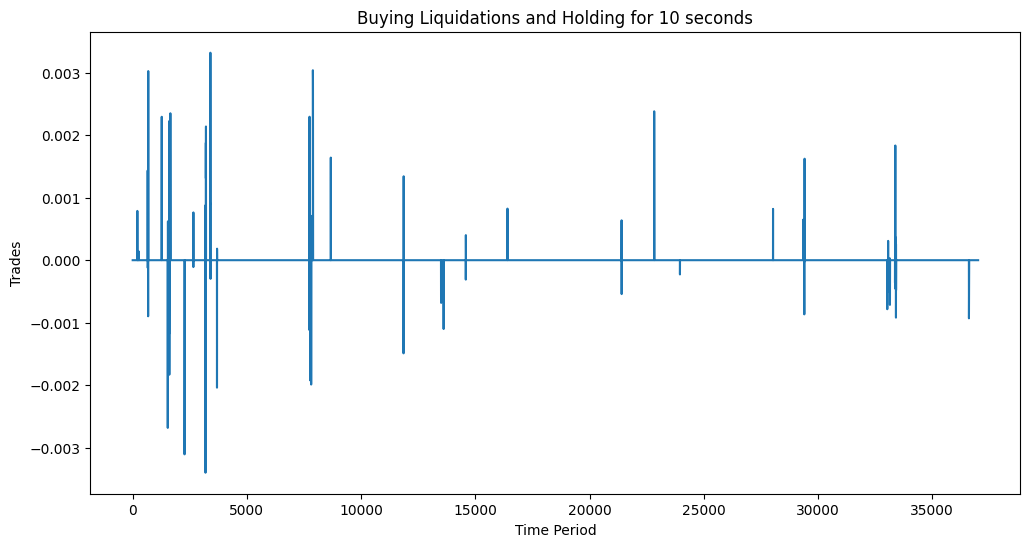

In [172]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the return stream
ax.plot(df2['Long10s'])

# Set the title and axis labels
ax.set_title('Buying Liquidations and Holding for 10 seconds')
ax.set_xlabel('Time Period')
ax.set_ylabel('Trades')

# Show the plot
plt.show()

In [158]:
#TODO

#compare with trend filter

#Do each Coin 1x1

#Manual test

#Consider fees

In [159]:
#export to check
df2.to_excel('C:/Users/asus/Desktop/Work/SOLLIQTESTS2.xlsx', index=False)
